In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 




In [4]:
decision = pd.read_csv('dados_ciclo_basic\decision.csv.csv')
fresults = pd.read_csv('dados_ciclo_basic\FIFA Results.csv')
penal = pd.read_csv('dados_ciclo_basic\penality kick.csv.csv')
rank = pd.read_csv('dados_ciclo_basic\Fifa_ranking_2022-10-06.csv')
dados_copa = pd.read_csv('dados_ciclo_basic\world_cup.csv')
match_results = pd.read_csv('dados_ciclo_basic\matches_1930_2022.csv')


In [5]:
decision.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
fresults.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [7]:
penal.head()

,date,home_team,apponent_team,winner
0,8/22/1967,India,Taiwan,Taiwan
1,11/14/1971,South Korea,Vietnam Republic,South Korea
2,5/7/1972,South Korea,Iraq,Iraq
3,5/17/1972,Thailand,South Korea,South Korea
4,5/19/1972,Thailand,Cambodia,Thailand


In [8]:
rank.head()

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46


In [9]:
dados_copa.head()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64


In [10]:
match_results.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...


In [11]:
titulos = dados_copa['Champion'].value_counts().reset_index()
titulos.columns = ['team', 'titles']

# Contar finais (título ou vice)
finais = pd.concat([dados_copa['Champion'], dados_copa['Runner-Up']])
finais = finais.value_counts().reset_index()
finais.columns = ['team', 'finals']

# Unir as duas tabelas
base_selecoes = pd.merge(titulos, finais, on='team', how='outer').fillna(0)
# Corrigir nomes
base_selecoes['team'] = base_selecoes['team'].replace({'West Germany': 'Germany'})

# Reagrupar somando títulos e finais
base_selecoes = base_selecoes.groupby('team', as_index=False).sum()

# Ordenar por número de títulos
base_selecoes = base_selecoes.sort_values('titles', ascending=False).reset_index(drop=True)



# Garantir que os valores estão como inteiros
base_selecoes['titles'] = base_selecoes['titles'].astype(int)
base_selecoes['finals'] = base_selecoes['finals'].astype(int)

print(base_selecoes.sort_values('titles', ascending=False))

              team  titles  finals
0           Brazil       5       7
1          Germany       4       8
2            Italy       4       6
3        Argentina       3       6
4           France       2       4
5          Uruguay       2       2
6          England       1       1
7            Spain       1       1
8          Croatia       0       1
9   Czechoslovakia       0       2
10         Hungary       0       2
11     Netherlands       0       3
12          Sweden       0       1


In [12]:

rank['team'] = rank['team'].str.strip().str.lower()
base_selecoes['team'] = base_selecoes['team'].str.strip().str.lower()

# Selecionar apenas as colunas úteis do ranking
rank = rank[['team', 'rank', 'points']]

# Juntar com base_selecoes
base_selecoes = pd.merge(base_selecoes, rank, on='team', how='left')

# Visualizar
print(base_selecoes.sort_values('titles', ascending=False))

              team  titles  finals  rank   points
0           brazil       5       7   1.0  1841.30
1          germany       4       8  11.0  1650.21
2            italy       4       6   6.0  1726.14
3        argentina       3       6   3.0  1773.88
4           france       2       4   4.0  1759.78
5          uruguay       2       2  14.0  1638.71
6          england       1       1   5.0  1728.47
7            spain       1       1   7.0  1715.22
8          croatia       0       1  12.0  1645.64
9   czechoslovakia       0       2   NaN      NaN
10         hungary       0       2  36.0  1492.20
11     netherlands       0       3   8.0  1694.51
12          sweden       0       1  25.0  1553.33


In [13]:
match_results['home_team'] = match_results['home_team'].str.lower().str.strip()
match_results['away_team'] = match_results['away_team'].str.lower().str.strip()

# Criar dataframes separados para casa e fora
home_stats = match_results[['home_team', 'home_score', 'away_score']].copy()
home_stats.columns = ['team', 'goals_for', 'goals_against']
home_stats['win'] = (home_stats['goals_for'] > home_stats['goals_against']).astype(int)
home_stats['draw'] = (home_stats['goals_for'] == home_stats['goals_against']).astype(int)
home_stats['loss'] = (home_stats['goals_for'] < home_stats['goals_against']).astype(int)

away_stats = match_results[['away_team', 'away_score', 'home_score']].copy()
away_stats.columns = ['team', 'goals_for', 'goals_against']
away_stats['win'] = (away_stats['goals_for'] > away_stats['goals_against']).astype(int)
away_stats['draw'] = (away_stats['goals_for'] == away_stats['goals_against']).astype(int)
away_stats['loss'] = (away_stats['goals_for'] < away_stats['goals_against']).astype(int)

# Concatenar estatísticas de casa e fora
all_stats = pd.concat([home_stats, away_stats])

# Agrupar por seleção
desempenho_geral = all_stats.groupby('team').agg({
    'goals_for': 'sum',
    'goals_against': 'sum',
    'win': 'sum',
    'draw': 'sum',
    'loss': 'sum'
}).reset_index()

# Calcular total de jogos
desempenho_geral['total_games'] = desempenho_geral['win'] + desempenho_geral['draw'] + desempenho_geral['loss']

print(desempenho_geral.sort_values('win', ascending=False).head())


         team  goals_for  goals_against  win  draw  loss  total_games
8      brazil        237            108   76    19    19          114
2   argentina        152            101   47    17    24           88
40      italy        128             77   45    21    17           83
28     france        136             85   39    14    20           73
29    germany        126             67   37     7    12           56


In [14]:
match_results['home_team'] = match_results['home_team'].str.lower().str.strip()
match_results['away_team'] = match_results['away_team'].str.lower().str.strip()

# Criar dataframes separados para casa e fora
home_stats = match_results[['home_team', 'home_score', 'away_score']].copy()
home_stats.columns = ['team', 'goals_for', 'goals_against']
home_stats['win'] = (home_stats['goals_for'] > home_stats['goals_against']).astype(int)
home_stats['draw'] = (home_stats['goals_for'] == home_stats['goals_against']).astype(int)
home_stats['loss'] = (home_stats['goals_for'] < home_stats['goals_against']).astype(int)

away_stats = match_results[['away_team', 'away_score', 'home_score']].copy()
away_stats.columns = ['team', 'goals_for', 'goals_against']
away_stats['win'] = (away_stats['goals_for'] > away_stats['goals_against']).astype(int)
away_stats['draw'] = (away_stats['goals_for'] == away_stats['goals_against']).astype(int)
away_stats['loss'] = (away_stats['goals_for'] < away_stats['goals_against']).astype(int)

# Concatenar estatísticas de casa e fora
all_stats = pd.concat([home_stats, away_stats])

# Agrupar por seleção
desempenho_geral = all_stats.groupby('team').agg({
    'goals_for': 'sum',
    'goals_against': 'sum',
    'win': 'sum',
    'draw': 'sum',
    'loss': 'sum'
}).reset_index()

# Calcular total de jogos
desempenho_geral['total_games'] = desempenho_geral['win'] + desempenho_geral['draw'] + desempenho_geral['loss']

print(desempenho_geral.sort_values('win', ascending=False).head())

         team  goals_for  goals_against  win  draw  loss  total_games
8      brazil        237            108   76    19    19          114
2   argentina        152            101   47    17    24           88
40      italy        128             77   45    21    17           83
28     france        136             85   39    14    20           73
29    germany        126             67   37     7    12           56


In [15]:
# Juntar as bases
base_selecoes = pd.merge(base_selecoes, desempenho_geral, on='team', how='left')
base_selecoes.head()

,team,titles,finals,rank,points,goals_for,goals_against,win,draw,loss,total_games
0,brazil,5,7,1.0,1841.30,237,108,76,19,19,114
1,germany,4,8,11.0,1650.21,126,67,37,7,12,56
2,italy,4,6,6.0,1726.14,128,77,45,21,17,83
3,argentina,3,6,3.0,1773.88,152,101,47,17,24,88
4,france,2,4,4.0,1759.78,136,85,39,14,20,73


In [16]:
ranking = base_selecoes.sort_values(by='points', ascending=False)
print(ranking[['team', 'points', 'win', 'draw', 'loss']].head(10))


           team   points  win  draw  loss
0        brazil  1841.30   76    19    19
3     argentina  1773.88   47    17    24
4        france  1759.78   39    14    20
6       england  1728.47   32    22    20
2         italy  1726.14   45    21    17
7         spain  1715.22   31    17    19
11  netherlands  1694.51   30    14    11
1       germany  1650.21   37     7    12
8       croatia  1645.64   13     8     9
5       uruguay  1638.71   25    13    21


In [17]:
base_selecoes['points_per_game'] = base_selecoes['points'] / base_selecoes['total_games']
print(base_selecoes.sort_values('points_per_game', ascending=False)[['team', 'points_per_game']].head(10))


           team  points_per_game
8       croatia        54.854667
10      hungary        46.631250
11  netherlands        30.809273
12       sweden        30.457451
1       germany        29.468036
5       uruguay        27.774746
7         spain        25.600299
4        france        24.106575
6       england        23.357703
2         italy        20.796867


In [18]:
# Usando base_selecoes diretamente
base_selecoes['pontos_conquistados'] = base_selecoes['win'] * 3 + base_selecoes['draw']
base_selecoes['pontos_possiveis'] = base_selecoes['total_games'] * 3

# Calcular o aproveitamento em %
base_selecoes['aproveitamento'] = (base_selecoes['pontos_conquistados'] / base_selecoes['pontos_possiveis']) * 100

# Visualizar os melhores aproveitamentos
print(base_selecoes[['team', 'aproveitamento']].sort_values(by='aproveitamento', ascending=False).head(10))


           team  aproveitamento
0        brazil       72.222222
1       germany       70.238095
11  netherlands       63.030303
2         italy       62.650602
3     argentina       59.848485
4        france       59.817352
7         spain       54.726368
6       england       53.153153
8       croatia       52.222222
10      hungary       50.000000


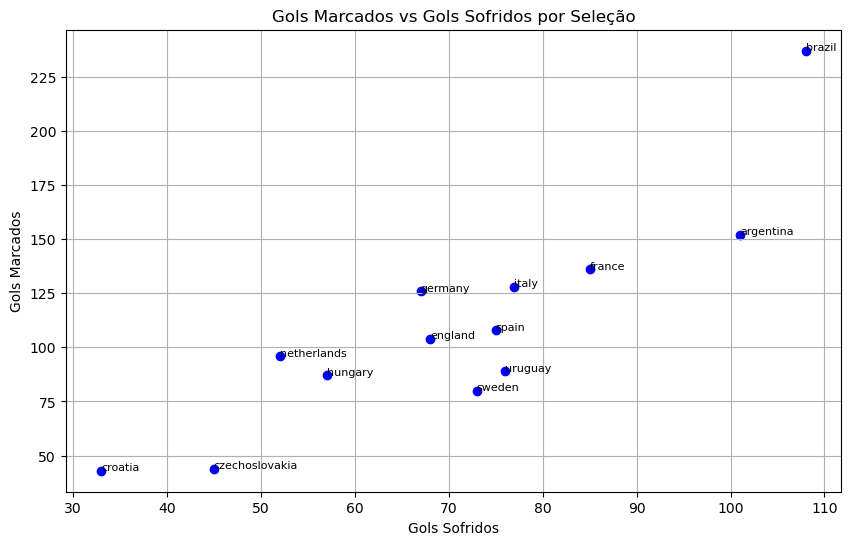

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(base_selecoes['goals_against'], base_selecoes['goals_for'], c='blue')
for i, row in base_selecoes.iterrows():
    plt.text(row['goals_against'], row['goals_for'], row['team'], fontsize=8)
plt.xlabel('Gols Sofridos')
plt.ylabel('Gols Marcados')
plt.title('Gols Marcados vs Gols Sofridos por Seleção')
plt.grid(True)
plt.show()

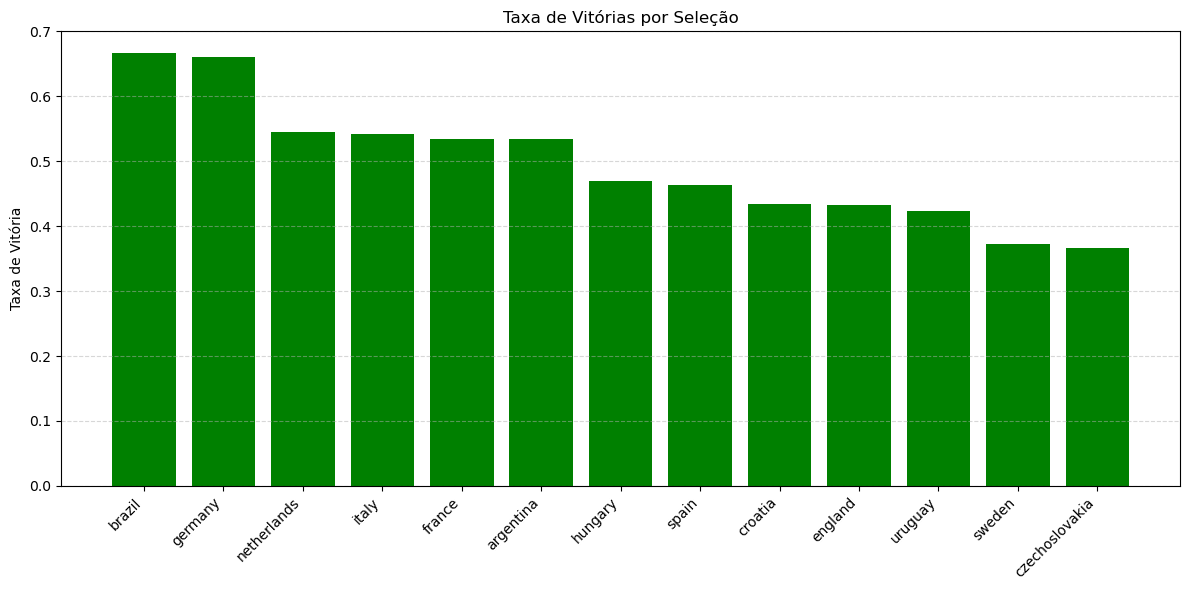

In [20]:
base_selecoes['win_rate'] = base_selecoes['win'] / base_selecoes['total_games']
base_selecoes_sorted = base_selecoes.sort_values(by='win_rate', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(base_selecoes_sorted['team'], base_selecoes_sorted['win_rate'], color='green')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Taxa de Vitória')
plt.title('Taxa de Vitórias por Seleção')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [21]:
base_selecoes.columns

Index(['team', 'titles', 'finals', 'rank', 'points', 'goals_for',
       'goals_against', 'win', 'draw', 'loss', 'total_games',
       'points_per_game', 'pontos_conquistados', 'pontos_possiveis',
       'aproveitamento', 'win_rate'],
      dtype='object')

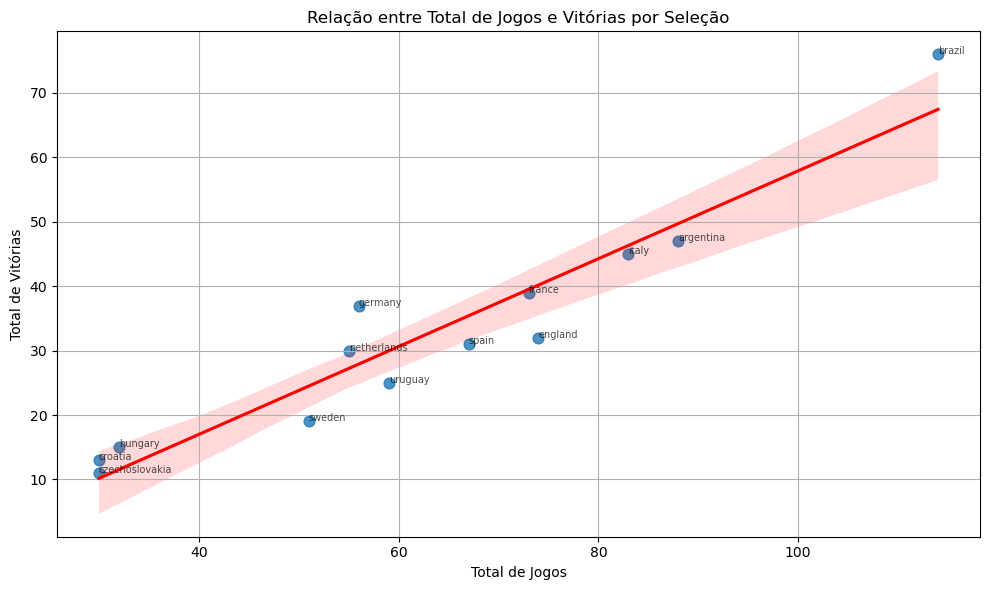

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(data=base_selecoes, x='total_games', y='win', scatter_kws={'s': 60}, line_kws={"color": "red"})
for i, row in base_selecoes.iterrows():
    plt.text(row['total_games'], row['win'], row['team'], fontsize=7, alpha=0.7)

plt.title('Relação entre Total de Jogos e Vitórias por Seleção')
plt.xlabel('Total de Jogos')
plt.ylabel('Total de Vitórias')
plt.grid(True)
plt.tight_layout()
plt.show()


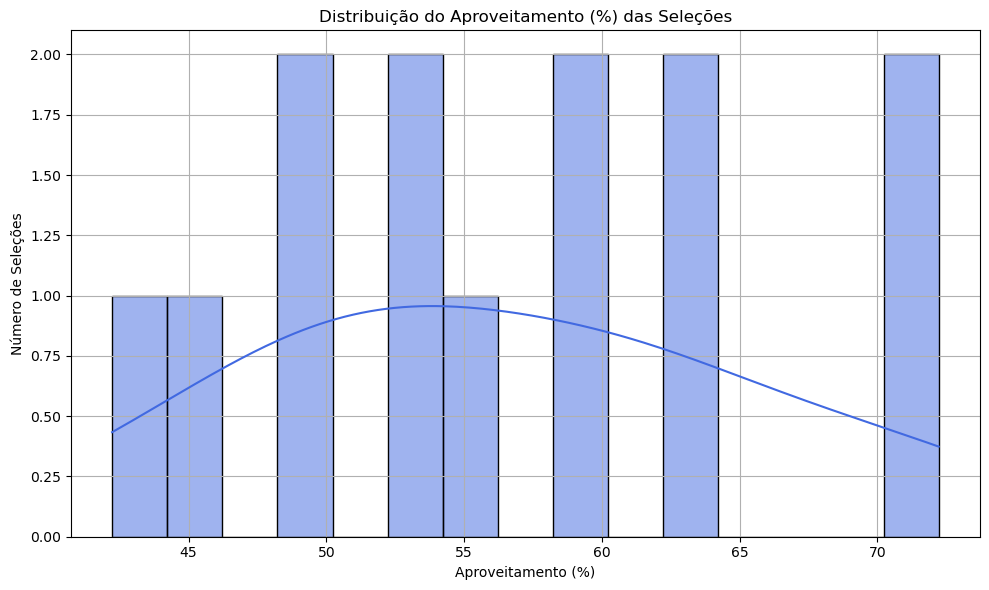

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(base_selecoes['aproveitamento'], bins=15, kde=True, color='royalblue')
plt.title('Distribuição do Aproveitamento (%) das Seleções')
plt.xlabel('Aproveitamento (%)')
plt.ylabel('Número de Seleções')
plt.grid(True)
plt.tight_layout()
plt.show()


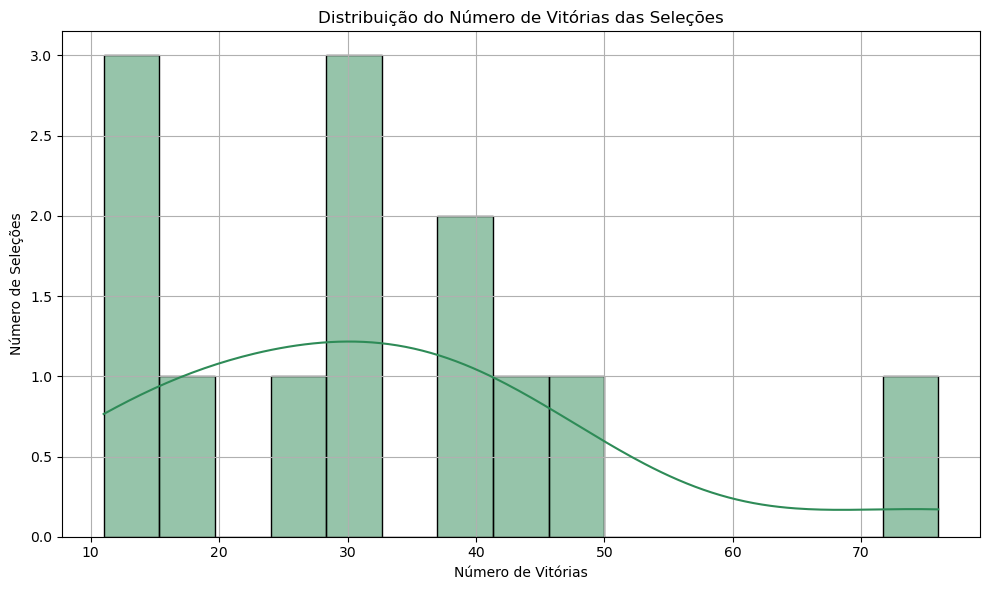

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(base_selecoes['win'], bins=15, kde=True, color='seagreen')
plt.title('Distribuição do Número de Vitórias das Seleções')
plt.xlabel('Número de Vitórias')
plt.ylabel('Número de Seleções')
plt.grid(True)
plt.tight_layout()
plt.show()


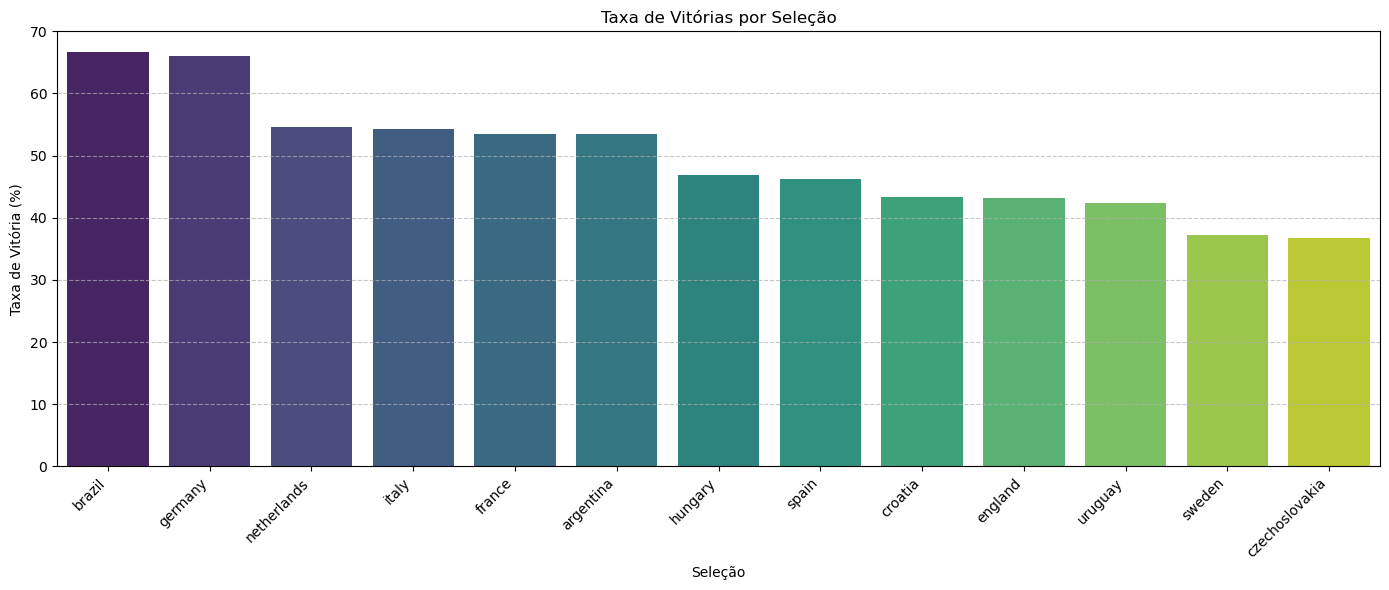

In [25]:
# Ordenar do maior para o menor
base_selecoes_sorted = base_selecoes.sort_values(by='win_rate', ascending=False)

# Converter para porcentagem
base_selecoes_sorted['win_rate_percent'] = base_selecoes_sorted['win_rate'] * 100

# Plotar
plt.figure(figsize=(14, 6))
sns.barplot(data=base_selecoes_sorted, x='team', y='win_rate_percent', palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Taxa de Vitória (%)')
plt.xlabel('Seleção')
plt.title('Taxa de Vitórias por Seleção')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values


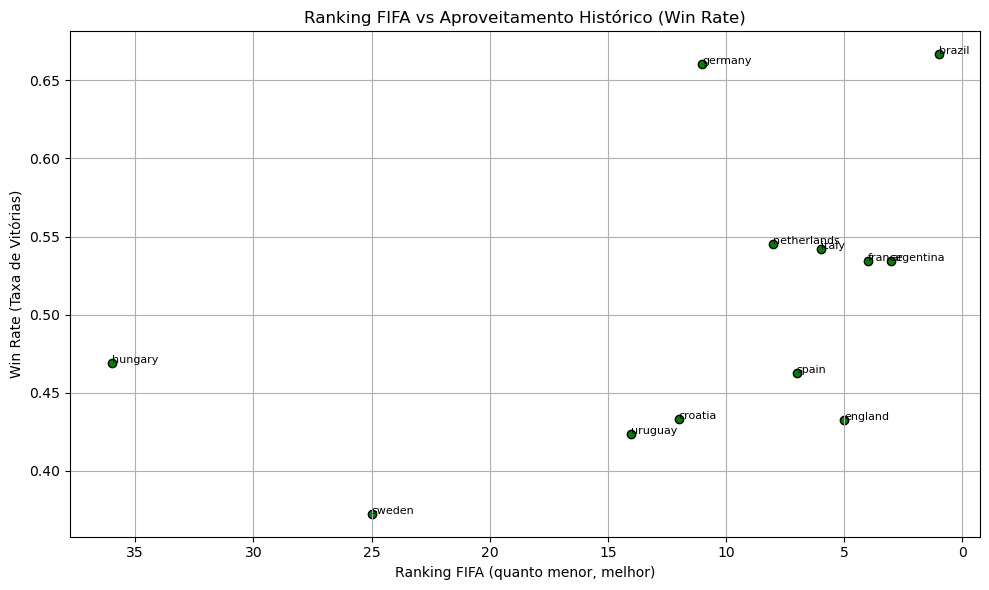

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(base_selecoes['rank'], base_selecoes['win_rate'], c='green', edgecolor='black')

# Adicionar os nomes das seleções
for i, row in base_selecoes.iterrows():
    plt.text(row['rank'], row['win_rate'], row['team'], fontsize=8)

plt.xlabel('Ranking FIFA (quanto menor, melhor)')
plt.ylabel('Win Rate (Taxa de Vitórias)')
plt.title('Ranking FIFA vs Aproveitamento Histórico (Win Rate)')
plt.grid(True)
plt.gca().invert_xaxis()  # Ranking menor é melhor, inverte para mostrar melhor desempenho à esquerda
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values


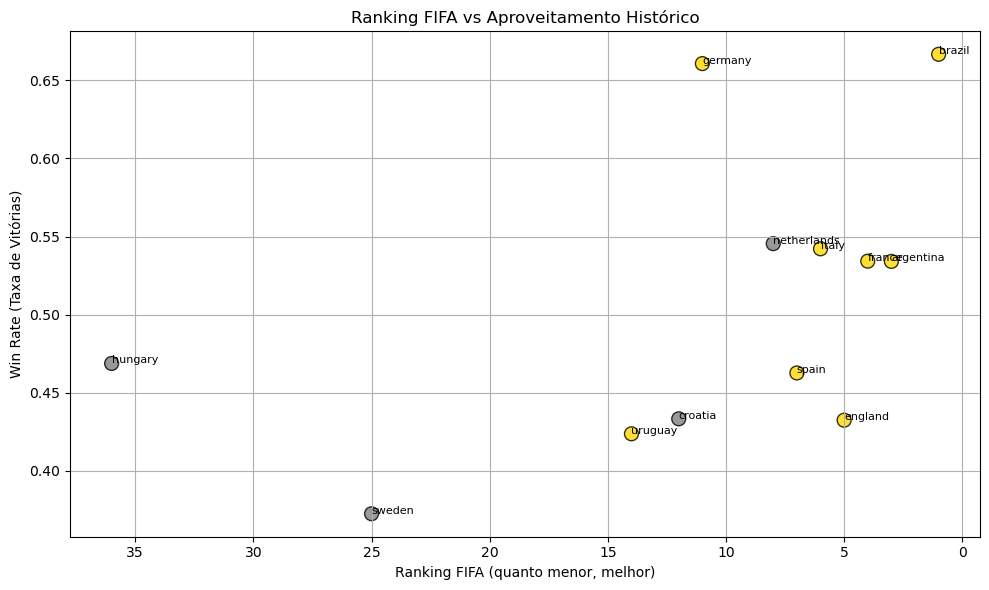

In [27]:
base_selecoes['tem_titulo'] = base_selecoes['titles'] > 0

plt.figure(figsize=(10, 6))
colors = base_selecoes['tem_titulo'].map({True: 'gold', False: 'gray'})

plt.scatter(base_selecoes['rank'], base_selecoes['win_rate'], c=colors, edgecolor='black', s=100, alpha=0.8)

# Anotar seleções
for i, row in base_selecoes.iterrows():
    plt.text(row['rank'], row['win_rate'], row['team'], fontsize=8)

plt.xlabel('Ranking FIFA (quanto menor, melhor)')
plt.ylabel('Win Rate (Taxa de Vitórias)')
plt.title('Ranking FIFA vs Aproveitamento Histórico')
plt.gca().invert_xaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
correlacao = base_selecoes[['rank', 'win_rate']].corr().iloc[0,1]
print(f"Correlação entre Ranking FIFA e Win Rate: {correlacao:.2f}")


Correlação entre Ranking FIFA e Win Rate: -0.47


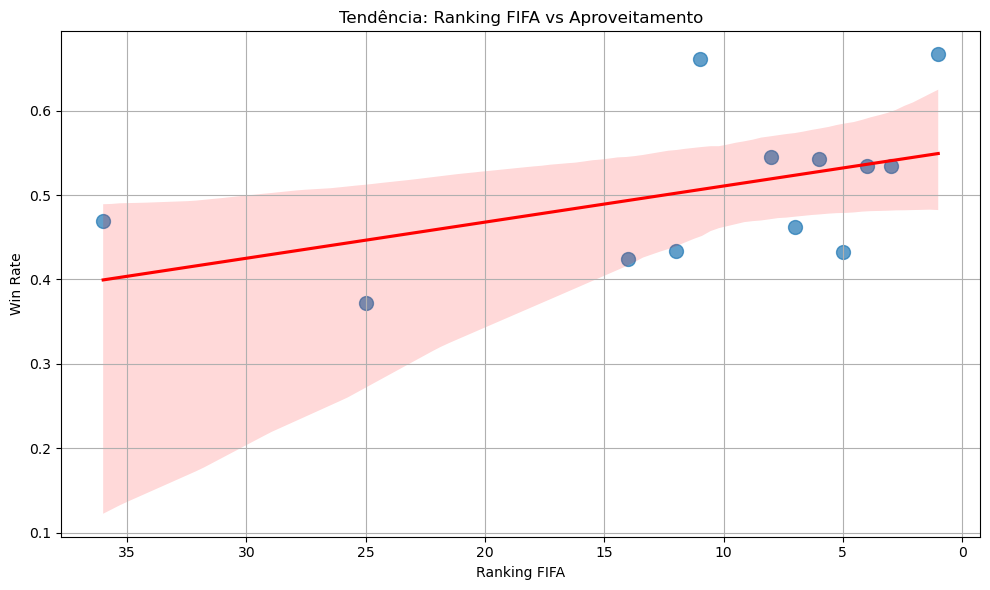

In [29]:
plt.figure(figsize=(10, 6))
sns.regplot(data=base_selecoes, x='rank', y='win_rate', scatter_kws={'s': 100, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.xlabel('Ranking FIFA')
plt.ylabel('Win Rate')
plt.title('Tendência: Ranking FIFA vs Aproveitamento')
plt.gca().invert_xaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
correlacao = base_selecoes[['rank', 'win_rate']].corr().iloc[0,1]
print(f"Correlação entre Ranking FIFA e Win Rate: {correlacao:.2f}")


Correlação entre Ranking FIFA e Win Rate: -0.47
